__Машинное обучение:__
* Обучение с учителем
 * Регрессии -> прогнозирование вещественного значения (стоимость недвижимости, цена акций, возраст клиента)
 * Классификации -> прогнозирование к какой группе относится объект ()
  * Алгоритмы: дерево решений, линейная регрессия, логистическая регрессия, ...

* Обучение без учителя
 * Кластеризация -> одинаковые объекты в одной группе, разные объекты - в разных
 * Снижение размерности -> для обучения модели (n - большая, m - более маленькая)
 * Визуализация многомерных данных -> двумерное / трехмерное пространство

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
# y = k*x + b
# y = k_1*x_1 + k_2*x_2 + ... + b

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape

(2, 10)

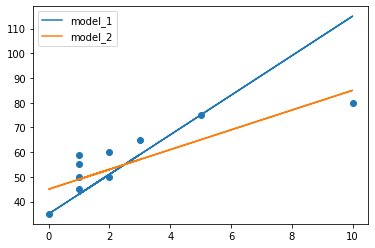

In [11]:
a = 8
b = 35
plt.scatter(X[1,:], y)
# y = a*x + b #
plt.plot(X[1, :], a*X[1, :] + b, label="model_1")
plt.plot(X[1, :], 4*X[1, :] + 45, label="model_2")
plt.legend(loc="best")

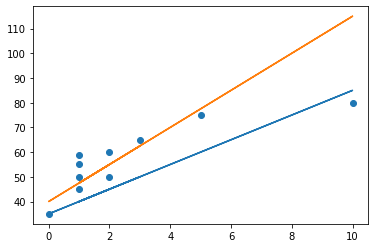

In [12]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [13]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [14]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [15]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

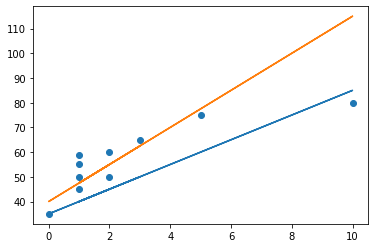

In [16]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [ ]:
# 1 - голубая
# 2 - оранжевая

In [17]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [19]:
# Никогда не использовать
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

err1, err2

(9.4, -2.1)

In [ ]:
err1, err2

In [20]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [21]:
mae_1, mae_2

(10.4, 7.9)

In [22]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [23]:
mse_1, mse_2

(143.6, 151.35)

In [26]:
y_pred_example = np.array([0.9, 2.5, 2.8, 5, 4.8])
y_true_example = np.array([1, 2, 3, 4, 50])

np.mean(np.square(y_pred_example - y_true_example)), np.mean(np.abs(y_pred_example - y_true_example))

(408.86800000000005, 9.4)

In [27]:
np.mean([1, 2, 3, 4, 5]), np.mean([1, 2, 3, 4, 50])

(3.0, 12.0)

In [28]:
np.median([1, 2, 3, 4, 5]), np.median([1, 2, 3, 4, 50])

(3.0, 3.0)

__Вывод__:
* MSE - если есть выбросы, и они для вас важны (важны при использовании модели)
* MAE - если выбросы не важны, модель должна работать хорошо на большинстве объектов

Метод наименьших квадратов

In [29]:
X.shape

(2, 10)

In [30]:
X.T.shape

(10, 2)

In [ ]:
# X = 1e6 x 1e5

In [31]:
# только для MSE
# ~ d**3
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

In [ ]:
# наблюдения, параметры, МНК: наблюдений >> параметров
# наблюдений << параметров. Пример: 

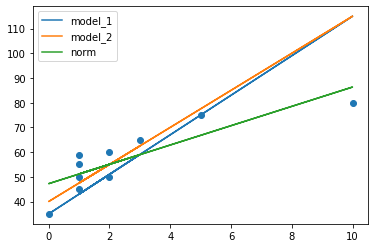

In [32]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*8, label="model_1")
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5, label="model_2")
plt.plot(X[1], W[0] + W[1] * X[1], label="norm")
plt.legend()

In [33]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [34]:
calc_mse(y, y_pred1)

143.6

In [35]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [36]:
calc_mae(y, y_pred1)

10.4

In [37]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [38]:
# RMSE - root mean squared error
np.sqrt(calc_mse(y, y_pred3))

6.777720855862981

In [ ]:
calc_mae(y, y_pred3)

In [ ]:
mse_old = 10.32
mse_new = 10.3199999

delta = 0.1

Градиентный спуск

In [ ]:
np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)
(w*x - y)**2

2*z`

w_1, w_2, ..., w_k: 2*x*(w*x - y)
w_0: 2*(w - y)

In [ ]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [ ]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0] - g

1. Подберите скорость обучения (alpha) и количество итераций:

In [ ]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

In [ ]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        if i % 100 == 0:
            print(i, W, err)

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [ ]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)